In [2]:
import tensorflow as tf;

print(tf.__version__)

2.13.0


In [3]:
!curl -O https://raw.githubusercontent.com/KyawKyawThar/ml_helper_func/refs/heads/main/helper.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22425  100 22425    0     0  29919      0 --:--:-- --:--:-- --:--:-- 29900 0 --:--:-- --:--:-- --:--:-- 29900


In [3]:
from tensorflow.keras import mixed_precision

In [4]:
from helper import create_tensorboard_callback

In [6]:
mixed_precision.set_global_policy("mixed_float16")

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [7]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [8]:
mixed_precision.set_global_policy("float32")

In [3]:
mixed_precision.global_policy()

<Policy "float32">

In [5]:

import tensorflow_datasets as tfds

In [12]:
data_sets_lists = tfds.list_builders()
data_sets_lists

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [13]:
target_dataset = "food101"
print(f"'{target_dataset}' in Tensorflow Datasets: {target_dataset in data_sets_lists }")

'food101' in Tensorflow Datasets: True


In [14]:
(train_data, test_data), ds_info = tfds.load(name="food101", # target dataset to get from TFDS
                                             split=["train", "validation"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=True, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns tuple (data, ds_info)

In [15]:
len(train_data)

75750

In [16]:
len(test_data)

25250

In [18]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [19]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [20]:
# Take one sample off the training data
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [21]:
#Let's loop through our single training sample and get some info from the image_tensor and label.

for image,label in train_one_sample:
    print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 31
  Class name (str form): donuts
        


we set the shuffle_files=True parameter in our tfds.load() method above, running the cell above a few times will give a different result each time.

Checking these you might notice some of the images have different shapes, for example (512, 342, 3) and (512, 512, 3) (height, width, color_channels).

Let's see what one of the image tensors from TFDS's Food101 dataset looks like.

In [22]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[131,  86,  55],
        [134,  89,  58],
        [137,  92,  61],
        ...,
        [131,  44,   0],
        [135,  49,   2],
        [138,  52,   5]],

       [[134,  89,  58],
        [135,  90,  59],
        [135,  90,  59],
        ...,
        [133,  46,   1],
        [134,  48,   1],
        [134,  48,   1]],

       [[136,  91,  60],
        [137,  92,  61],
        [139,  94,  63],
        ...,
        [137,  53,   7],
        [135,  51,   5],
        [131,  47,   1]],

       ...,

       [[130,  23,   3],
        [134,  31,  14],
        [132,  36,  24],
        ...,
        [243, 248, 242],
        [243, 248, 242],
        [243, 248, 242]],

       [[128,  22,   0],
        [129,  26,   7],
        [124,  28,  14],
        ...,
        [243, 248, 241],
        [242, 247, 240],
        [242, 247, 240]],

       [[132,  26,   2],
        [133,  31,   9],
        [126,  29,  13],
        ...,
        [242, 247, 24

In [23]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

(-0.5, 511.5, 511.5, -0.5)

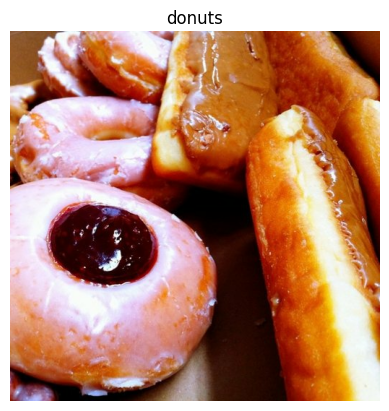

In [24]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [25]:
def preposs_image(img,label,image_size=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(img,[image_size,image_size])
    return tf.cast(image,tf.float64),label

In [26]:
preprocessed_img = preposs_image(image,label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[131  86  55]
  [134  89  58]
  [137  92  61]
  ...
  [131  44   0]
  [135  49   2]
  [138  52   5]]

 [[134  89  58]
  [135  90  59]
  [135  90  59]
  ...
  [133  46   1]
  [134  48   1]
  [134  48   1]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[1.34030609e+02 8.90306168e+01 5.80306129e+01]
  [1.36045914e+02 9.10459213e+01 6.00459175e+01]
  [1.37846939e+02 9.28469391e+01 6.38469391e+01]
  ...
  [1.30265366e+02 4.79183846e+01 1.62753057e+00]
  [1.30760223e+02 4.37602272e+01 4.59267795e-02]
  [1.34739838e+02 4.87398338e+01 1.73983324e+00]]

 [[1.41551025e+02 9.65510254e+01 6.55510254e+01]
  [1.49081650e+02 1.04081635e+02 7.30816345e+01]
  [1.51632660e+02 1.06632652e+02 7.56326523e+01]
  ...
  [1.30357101e+02 4.85713654e+01 1.99989128e+00]
  [1.34147995e+02 5.01479988e+01 4.14799976e+00]
  [1.33571289e+02 4.95712891e+01 3.57128906e+00]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float64'>


(-0.5, 223.5, 223.5, -0.5)

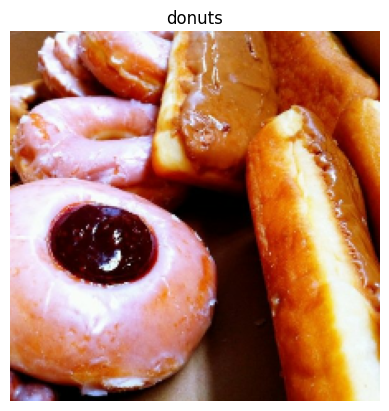

In [27]:
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False)

## Batch & prepare datasets

Before we can model our data, we have to turn it into batches.

Why?

Because computing on batches is memory efficient.

We turn our data from 101,000 image tensors and labels (train and test combined) into batches of 32 image and label pairs, thus enabling it to fit into the memory of our GPU.

To do this in effective way, we're going to be leveraging a number of methods from the [`tf.data` API](https://www.tensorflow.org/api_docs/python/tf/data).

> 📖 **Resource:** For loading data in the most performant way possible, see the TensorFlow docuemntation on [Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance).

Specifically, we're going to be using:

* [`map()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) - maps a predefined function to a target dataset (e.g. `preprocess_img()` to our image tensors)
* [`shuffle()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle) - randomly shuffles the elements of a target dataset up `buffer_size` (ideally, the `buffer_size` is equal to the size of the dataset, however, this may have implications on memory)
* [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) - turns elements of a target dataset into batches (size defined by parameter `batch_size`)
* [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) - prepares subsequent batches of data whilst other batches of data are being computed on (improves data loading speed but costs memory)
* Extra: [`cache()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache) - caches (saves them for later) elements in a target dataset, saving loading time (will only work if your dataset is small enough to fit in memory) 

Things to note:
- Can't batch tensors of different shapes (e.g. different image sizes, need to reshape images first, hence our `preprocess_img()` function)
- `shuffle()` keeps a buffer of the number you pass it images shuffled, ideally this number would be all of the samples in your training set, however, if your training set is large, this buffer might not fit in memory (a fairly large number like 1000 or 10000 is usually suffice for shuffling)
- For methods with the `num_parallel_calls` parameter available (such as `map()`), setting it to`num_parallel_calls=tf.data.AUTOTUNE` will parallelize preprocessing and significantly improve speedtraining_logs
- Can't use `cache()` unless your dataset can fit in memory



We're going to through things in the following order:

```
Original dataset (e.g. train_data) -> map() -> shuffle() -> batch() -> prefetch() -> PrefetchDataset
```

This is like saying, 

> "Hey, map this preprocessing function across our training dataset, then shuffle a number of elements before batching them together and make sure you prepare new batches (prefetch) whilst the model is looking through the current batch".

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/07-prefetching-from-hands-on-ml.png)

*What happens when you use prefetching (faster) versus what happens when you don't use prefetching (slower). **Source:** Page 422 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).*


In [28]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [29]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preposs_image, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preposs_image, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [30]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [80]:
import os

# 1. Create the directory to store checkpoints
os.makedirs("model_checkpoints",exist_ok=True)

# 2. Define the Dynamic Path
# Note: Because the filename changes (it includes epoch and accuracy), 
# 'save_best_only=True' will save a NEW file every time the model improves,
# rather than overwriting a single file. This creates a nice history of your best runs.

checkpoint_path = "model_checkpoints/model_epoch_{epoch:02d}_val_acc{val_accuracy:.2f}.ckpt"

# 3. Create the Callbacks

# Callback A: Save Model Weights
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(checkpoint_path, # Uses the dynamic path defined above
                                                monitor="val_accuracy", 
                                                save_best_only=True, # Only save if accuracy improves
                                                save_weights_only=True,# Save weights only (lighter file)
                                                verbose=1)

# Callback B: Stop Early (Prevents Overfitting)
early_stop_cb = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=5, # Stop if no improvement for 5 epochs
                                                 restore_best_weights=True #  CRITICAL: Reverts model to best state at end
                                                )

# Callback C: Reduce Learning Rate (Helps fine-tune)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                   factor=0.2, # Reduce LR to 20% of current value
                                                   patience=3, # Wait 3 epochs before reducing
                                                   min_lr=1e-6,  # Don't go below this value
                                                   verbose=1)


In [33]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

data_augmention = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2)
    #layers.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
],name="data_augmention")

In [49]:
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

In [57]:


inputs = layers.Input(shape=(224,224,3), name="input_layers") # shape of input image
x = data_augmention(inputs) # augment images (only happens during training)

x = base_model(x,training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)  # pool the outputs of the base model
outputs = layers.Dense(len(class_names),activation="softmax", name="output_layer")(x) # same number of outputs as classes
model = tf.keras.Model(inputs,outputs)

In [58]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=8>

In [59]:
model.compile(loss="sparse_categorical_crossentropy",# Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=["accuracy"]
             )

In [69]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 data_augmention (Sequentia  (None, None, None, 3)     0         
 l)                                                              
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_2D   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                             

In [70]:
len(train_data)

2368

In [72]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

history_101_food_classes_feature_extract = model.fit(train_data,
                                                    epochs=3,
                                                    steps_per_epoch=len(train_data),
                                                    validation_data=test_data,
                                                    validation_steps=int(0.15 * len(test_data)),
                                                    callbacks=[create_tensorboard_callback("training_logs","efficientnetb0_101_classes_all_data_feature_extract"),
                                                              checkpoint_cb])

NameError: name 'model' is not defined

In [68]:
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 183s 232ms/step - loss: 1.1566 - accuracy: 0.6843


[1.1566263437271118, 0.6843168139457703]

## Load and evaluate checkpoint weights

We can load in and evaluate our model's checkpoints by:

1. Recreating a new instance of our model called `created_model` by turning our original model creation code into a function called `create_model()`. 
2. Compiling our `created_model` with the same loss, optimizer and metrics as the original model (every time you create a new model, you must compile it).
3. Calling the `load_weights()` method on our `created_model` and passing it the path to where our checkpointed weights are stored.
4. Calling `evaluate()` on `created_model` with loaded weights and saving the results.
5. Comparing the `created_model` results to our previous `model` results (these should be the exact same, if not very close).

A reminder, checkpoints are helpful for when you perform an experiment such as fine-tuning your model. In the case you fine-tune your feature extraction model and find it doesn't offer any improvements, you can always revert back to the checkpointed version of your model.

> **Note:** This section originally used the [`tf.keras.clone_model` method](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model), however, due to several potential errors with that method, it changed to create a new model (rather than cloning) via a `create_model()` function. See the [discussion on the course GitHub](https://github.com/mrdbourke/tensorflow-deep-learning/discussions/550) for more.

In [ ]:
# 2. Create and compile a new version of the original model (new weights)
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# 3. Load the saved weights
created_model.load_weights(checkpoint_path)

# 4. Evaluate the model with loaded weights
results_created_model_with_loaded_weights = created_model.evaluate(test_data)

In [134]:
import glob
import os
import numpy as np
import random

In [36]:
# 1. Create a function to recreate the original model
def create_model():

    input_shape = (224,224,3)
    base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
    base_model.trainable = False


    inputs = layers.Input(shape=input_shape,name="input_layer") #shape of input image
    x = data_augmention(inputs)
    x = base_model(x,training=False)
    x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
    outputs=layers.Dense(len(class_names),activation="softmax",name="output_layer")(x)
    model =  tf.keras.Model(inputs,outputs)
    return model

# 2. Create and compile a new version of the original model (new weights)

create_model = create_model()
create_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer=tf.keras.optimizers.legacy.Adam(),
                    metrics=["accuracy"])

# 3. Load the saved weights
list_of_files = glob.glob("model_checkpoints/*.index")
if list_of_files:
    list_of_files = max(list_of_files,key=os.path.getctime)
    ck_path = list_of_files.replace(".index","")
create_model.load_weights(ck_path)
# # 4. Evaluate the model with loaded weights
results_created_model_with_loaded_weights = create_model.evaluate(test_data)

790/790 [==============================] - 183s 231ms/step - loss: 1.1566 - accuracy: 0.6843


In [84]:

np.isclose(results_feature_extract_model,results_created_model_with_loaded_weights)

array([ True,  True])

## Save the whole model to file

We can also save the whole model using the [`save()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save) method.



In [86]:
save_dir = "efficientnetv2b0_feature_extract_model_precision"

#Save the model

model.save(save_dir)

# Verify it exists (Check your local folder)

if os.path.exists(save_dir):
    print(f"✅ Confirmed: Folder '{save_dir}' exists.")
    print("Contents:", os.listdir(save_dir)) # Should show: assets, variables, saved_model.pb
else:
    print("❌ Error: Folder not found.")

✅ Confirmed: Folder 'efficientnetv2b0_feature_extract_model_precision' exists.
Contents: ['fingerprint.pb', 'keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']


In [8]:
loaded_model = tf.keras.models.load_model("efficientnetv2b0_feature_extract_model_precision")

In [31]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
result_load_model = loaded_model.evaluate(test_data)
result_load_model

790/790 [==============================] - 184s 232ms/step - loss: 1.1566 - accuracy: 0.6843


[1.156625509262085, 0.6843168139457703]

In [39]:
np.isclose(results_created_model_with_loaded_weights,result_load_model)

array([ True,  True])

In [42]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 data_augmention (Sequentia  (None, None, None, 3)     0         
 l)                                                              
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_2D   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                             

In [60]:
for layer in loaded_model.layers:
    print(layer.name,layer.trainable)

input_layers True
data_augmention True
efficientnetv2-b0 False
global_average_pooling_2D True
output_layer True


In [57]:
for layer_num, layer in enumerate(base_model.layers):
     print(layer_num, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [203]:
loaded_base_model = loaded_model.layers[2]
loaded_base_model.trainable = True

for layer in loaded_base_model.layers[:-30]:
    layer.trainable = False

In [204]:
for layer in loaded_model.layers:
    print(layer.name,layer.trainable)

input_layers True
data_augmention True
efficientnetv2-b0 True
global_average_pooling_2D True
output_layer True


In [205]:
print(f"Total layers in EfficientNet: {len(loaded_base_model.layers)}") # Should be ~200+
print(f"Trainable weights: {len(loaded_base_model.trainable_variables)}") # Should be > 0


Total layers in EfficientNet: 270
Trainable weights: 26


In [206]:
loaded_model.compile(loss="sparse_categorical_crossentropy",
                         optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
                         metrics=["accuracy"])

In [207]:
# Turn off all warnings except for errors

tf.get_logger().setLevel("ERROR")
initial_epochs = 3
fine_tune_epochs = initial_epochs + 7
history_101_food_classes_fine_tune = loaded_model.fit(train_data,
                                                           epochs=fine_tune_epochs,
                                                           initial_epoch=initial_epochs,
                                                           validation_data=test_data,
                                                           validation_steps=int(0.15 * len(test_data)),
                                                           callbacks=[create_tensorboard_callback("training_fine_logs","efficientnetb0_101_classes_all_data_fine_tune"),
                                                              checkpoint_cb, early_stop_cb, reduce_lr_cb])
                                                          

Epoch 4/10
2368/2368 [==============================] - ETA: 0s - loss: 0.9362 - accuracy: 0.7452
Epoch 4: val_accuracy did not improve from 0.75397
2368/2368 [==============================] - 651s 273ms/step - loss: 0.9362 - accuracy: 0.7452 - val_loss: 0.8837 - val_accuracy: 0.7532 - lr: 1.0000e-04
Epoch 5/10
2368/2368 [==============================] - ETA: 0s - loss: 0.8787 - accuracy: 0.7594
Epoch 5: val_accuracy improved from 0.75397 to 0.75927, saving model to model_checkpoints/model_epoch_05_val_acc0.76.ckpt
2368/2368 [==============================] - 657s 277ms/step - loss: 0.8787 - accuracy: 0.7594 - val_loss: 0.8815 - val_accuracy: 0.7593 - lr: 1.0000e-04
Epoch 6/10
2368/2368 [==============================] - ETA: 0s - loss: 0.8319 - accuracy: 0.7694
Epoch 6: val_accuracy improved from 0.75927 to 0.76271, saving model to model_checkpoints/model_epoch_06_val_acc0.76.ckpt
2368/2368 [==============================] - 667s 282ms/step - loss: 0.8319 - accuracy: 0.7694 - val_lo

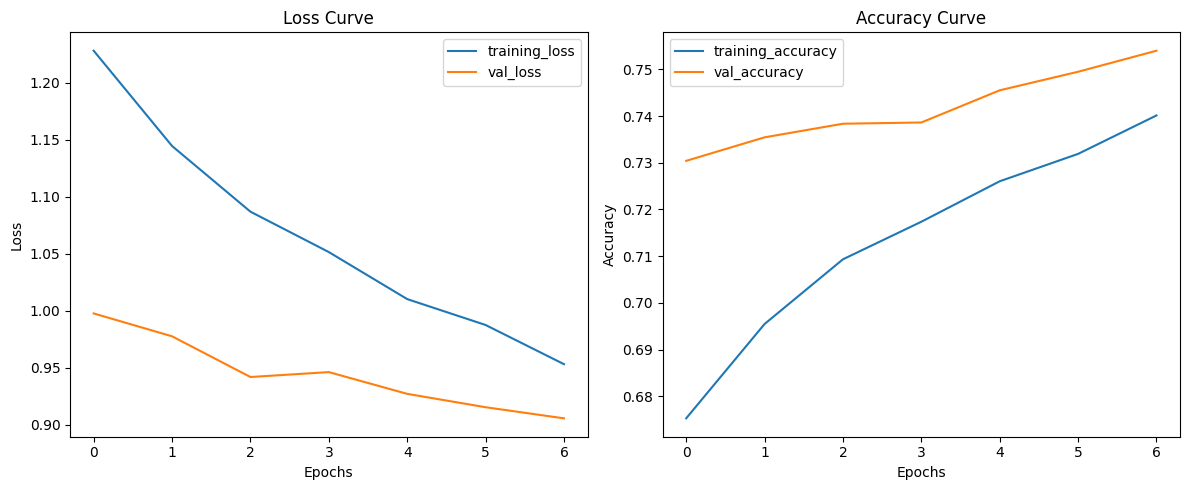

In [87]:
from helper import plot_loss_curves
plot_loss_curves(history_101_food_classes_fine_tune)

In [90]:
save_dir = "efficientnetv2b0_fine_tune_model_precision"

#Save the model

loaded_model.save(save_dir)

# Verify it exists (Check your local folder)

if os.path.exists(save_dir):
    print(f"✅ Confirmed: Folder '{save_dir}' exists.")
    print("Contents:", os.listdir(save_dir)) # Should show: assets, variables, saved_model.pb
else:
    print("❌ Error: Folder not found.")

✅ Confirmed: Folder 'efficientnetv2b0_fine_tune_model_precision' exists.
Contents: ['fingerprint.pb', 'keras_metadata.pb', 'variables', 'saved_model.pb', 'assets']


In [92]:
loaded_fine_tune_model = tf.keras.models.load_model("efficientnetv2b0_fine_tune_model_precision")

In [111]:
result_fine_tune_model_loss,result_fine_tune_model_accuracy = loaded_fine_tune_model.evaluate(test_data)
result_fine_tune_model_loss,result_fine_tune_model_accuracy

790/790 [==============================] - 161s 204ms/step - loss: 0.9181 - accuracy: 0.7510


(0.9180608987808228, 0.7509703040122986)

label variable actually contains the image data, and your images variable contains the label.
The weird numbers you see (52446, 108412...) are effectively the index of the brightest pixel in each image, not the class label (which should be between 0 and 100).


🔑 Note: This unravelling is why we shuffle=False when creating the test data object. Otherwise, whenever we loaded the test dataset (like when making predictions), it would be shuffled every time, meaning if we tried to compare our predictions to the labels, they would be in different orders.


we used sparse_categorical_crossentropy. This implies your labels are already integers (e.g., 75), not One-Hot encoded vectors (e.g., [0, 0, ... 1, ... 0]).
If you apply .argmax() to a single integer (e.g., 75), you get 0 (the index of the scalar). 
You only use .argmax() on the predictions, not the true labels (if using sparse labels). #  y_labels.append(label.numpy().argmax())

## Evaluating our models predictions
A very simple evaluation is to use Scikit-Learn's accuracy_score() function which compares truth labels to predicted labels and returns an accuracy score.

If we've created our y_labels and pred_classes arrays correctly, this should return the same accuracy value (or at least very close) as the evaluate() method we used earlier.

In [117]:
from sklearn.metrics import accuracy_score

y_labels = []
pred_classes = []


for image,label in test_data:
    # 1. Get the TRUE labels
    y_labels.extend(label.numpy())
    # 2. Get the PREDICTIONS for this specific batch
    batch_predict = loaded_fine_tune_model.predict(image,verbose=0)
     # 3. Use ARGMAX to convert probabilities to integers
    pred_classes.extend(batch_predict.argmax(axis=1))
    
# Now calculate accuracy

sklearn_accuracy = accuracy_score(y_labels,pred_classes)
# Compare with the model.evaluate score

print(f"Sklearn Accuracy: {sklearn_accuracy}")



Sklearn Accuracy: 0.750970297029703
Close? True | Difference: -6.9825956128255484e-09


In [118]:
print(f"Close? {np.isclose(sklearn_accuracy,result_fine_tune_model_accuracy)} | Difference: {   result_fine_tune_model_accuracy - sklearn_accuracy}")

Close? True | Difference: 6.9825956128255484e-09


In [119]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [120]:
## Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                     y_pred=pred_classes,
                     classes=class_names,
                     figsize=(100,100),
                     text_size=20,
                     norm=False,
                     savefig=True)

Woah! Now that's a big confusion matrix. It may look a little daunting at first but after zooming in a little, we can see how it gives us insight into which classes its getting "confused" on.

The good news is, the majority of the predictions are right down the top left to bottom right diagonal, meaning they're correct.

It looks like the model gets most confused on classes which look visualually similar, such as predicting filet_mignon for instances of pork_chop and chocolate_cake for instances of tiramisu.

Since we're working on a classification problem, we can further evaluate our model's predictions using Scikit-Learn's classification_report() function.

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56       250
           1       0.73      0.79      0.76       250
           2       0.83      0.75      0.79       250
           3       0.88      0.74      0.81       250
           4       0.73      0.65      0.69       250
           5       0.69      0.59      0.64       250
           6       0.81      0.85      0.83       250
           7       0.94      0.82      0.88       250
           8       0.42      0.69      0.52       250
           9       0.63      0.71      0.67       250
          10       0.67      0.66      0.66       250
          11       0.84      0.77      0.80       250
          12       0.82      0.78      0.80       250
          13       0.78      0.71      0.74       250
          14       0.76      0.70      0.73       250
          15       0.64      0.56      0.60       250
          16       0.59      0.63      0.61       250
          17       0.76    

The classification_report() outputs the precision, recall and f1-score's per class

these are the result classes by class.for example we have class 0 to 100
the values for each is between 0 and 1 and the higher is better. 0 is very poor and 1 is perfect .
for example:  0       0.35      0.19      0.24       250 (this is for class 0 and percision, recall is very poor)

A reminder:

* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).
* Recall - Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.
* F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
The above output is helpful but with so many classes, it's a bit hard to understand.

Let's see if we make it easier with the help of a visualization.

First, we'll get the output of classification_report() as a dictionary by setting output_dict=True.

In [122]:
classification_report_dict = classification_report(y_labels,pred_classes,output_dict=True)
classification_report_dict

{'0': {'precision': 0.5261324041811847,
  'recall': 0.604,
  'f1-score': 0.5623836126629422,
  'support': 250.0},
 '1': {'precision': 0.7279411764705882,
  'recall': 0.792,
  'f1-score': 0.7586206896551724,
  'support': 250.0},
 '2': {'precision': 0.831858407079646,
  'recall': 0.752,
  'f1-score': 0.7899159663865547,
  'support': 250.0},
 '3': {'precision': 0.8815165876777251,
  'recall': 0.744,
  'f1-score': 0.806941431670282,
  'support': 250.0},
 '4': {'precision': 0.7330316742081447,
  'recall': 0.648,
  'f1-score': 0.6878980891719746,
  'support': 250.0},
 '5': {'precision': 0.6883720930232559,
  'recall': 0.592,
  'f1-score': 0.6365591397849463,
  'support': 250.0},
 '6': {'precision': 0.8098859315589354,
  'recall': 0.852,
  'f1-score': 0.8304093567251462,
  'support': 250.0},
 '7': {'precision': 0.9444444444444444,
  'recall': 0.816,
  'f1-score': 0.8755364806866952,
  'support': 250.0},
 '8': {'precision': 0.4174757281553398,
  'recall': 0.688,
  'f1-score': 0.519637462235649

Alright, there's still a fair few values here, how about we narrow down?

Since the f1-score combines precision and recall in one metric, let's focus on that.

To extract it, we'll create an empty dictionary called class_f1_scores and then loop through each item in classification_report_dict, appending the class name and f1-score as the key, value pairs in class_f1_scores.

In [124]:
class_f1_scores = {}

for k,v in classification_report_dict.items():
    if k == "accuracy":
        break
    else:
        class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.5623836126629422,
 'baby_back_ribs': 0.7586206896551724,
 'baklava': 0.7899159663865547,
 'beef_carpaccio': 0.806941431670282,
 'beef_tartare': 0.6878980891719746,
 'beet_salad': 0.6365591397849463,
 'beignets': 0.8304093567251462,
 'bibimbap': 0.8755364806866952,
 'bread_pudding': 0.5196374622356494,
 'breakfast_burrito': 0.6679245283018868,
 'bruschetta': 0.6612903225806452,
 'caesar_salad': 0.8016701461377871,
 'cannoli': 0.7999999999999999,
 'caprese_salad': 0.7432150313152401,
 'carrot_cake': 0.7318087318087317,
 'ceviche': 0.5965665236051502,
 'cheesecake': 0.6088631984585742,
 'cheese_plate': 0.7580645161290323,
 'chicken_curry': 0.6867924528301886,
 'chicken_quesadilla': 0.7494736842105263,
 'chicken_wings': 0.817829457364341,
 'chocolate_cake': 0.6979362101313321,
 'chocolate_mousse': 0.5525040387722133,
 'churros': 0.8607068607068608,
 'clam_chowder': 0.8210922787193974,
 'club_sandwich': 0.8503937007874015,
 'crab_cakes': 0.6228239845261122,
 'creme_brulee': 

In [130]:
import pandas as pd

f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                         "f1_score": list(class_f1_scores.values())}).sort_values("f1_score",ascending=False)
f1_scores

class_name  f1_score
33            edamame  0.985972
63           macarons  0.944785
54  hot_and_sour_soup  0.909091
69            oysters  0.904110
65            mussels  0.903093
..                ...       ...
56   huevos_rancheros  0.525114
8       bread_pudding  0.519637
39          foie_gras  0.513919
77          pork_chop  0.471655
93              steak  0.455487

[101 rows x 2 columns]

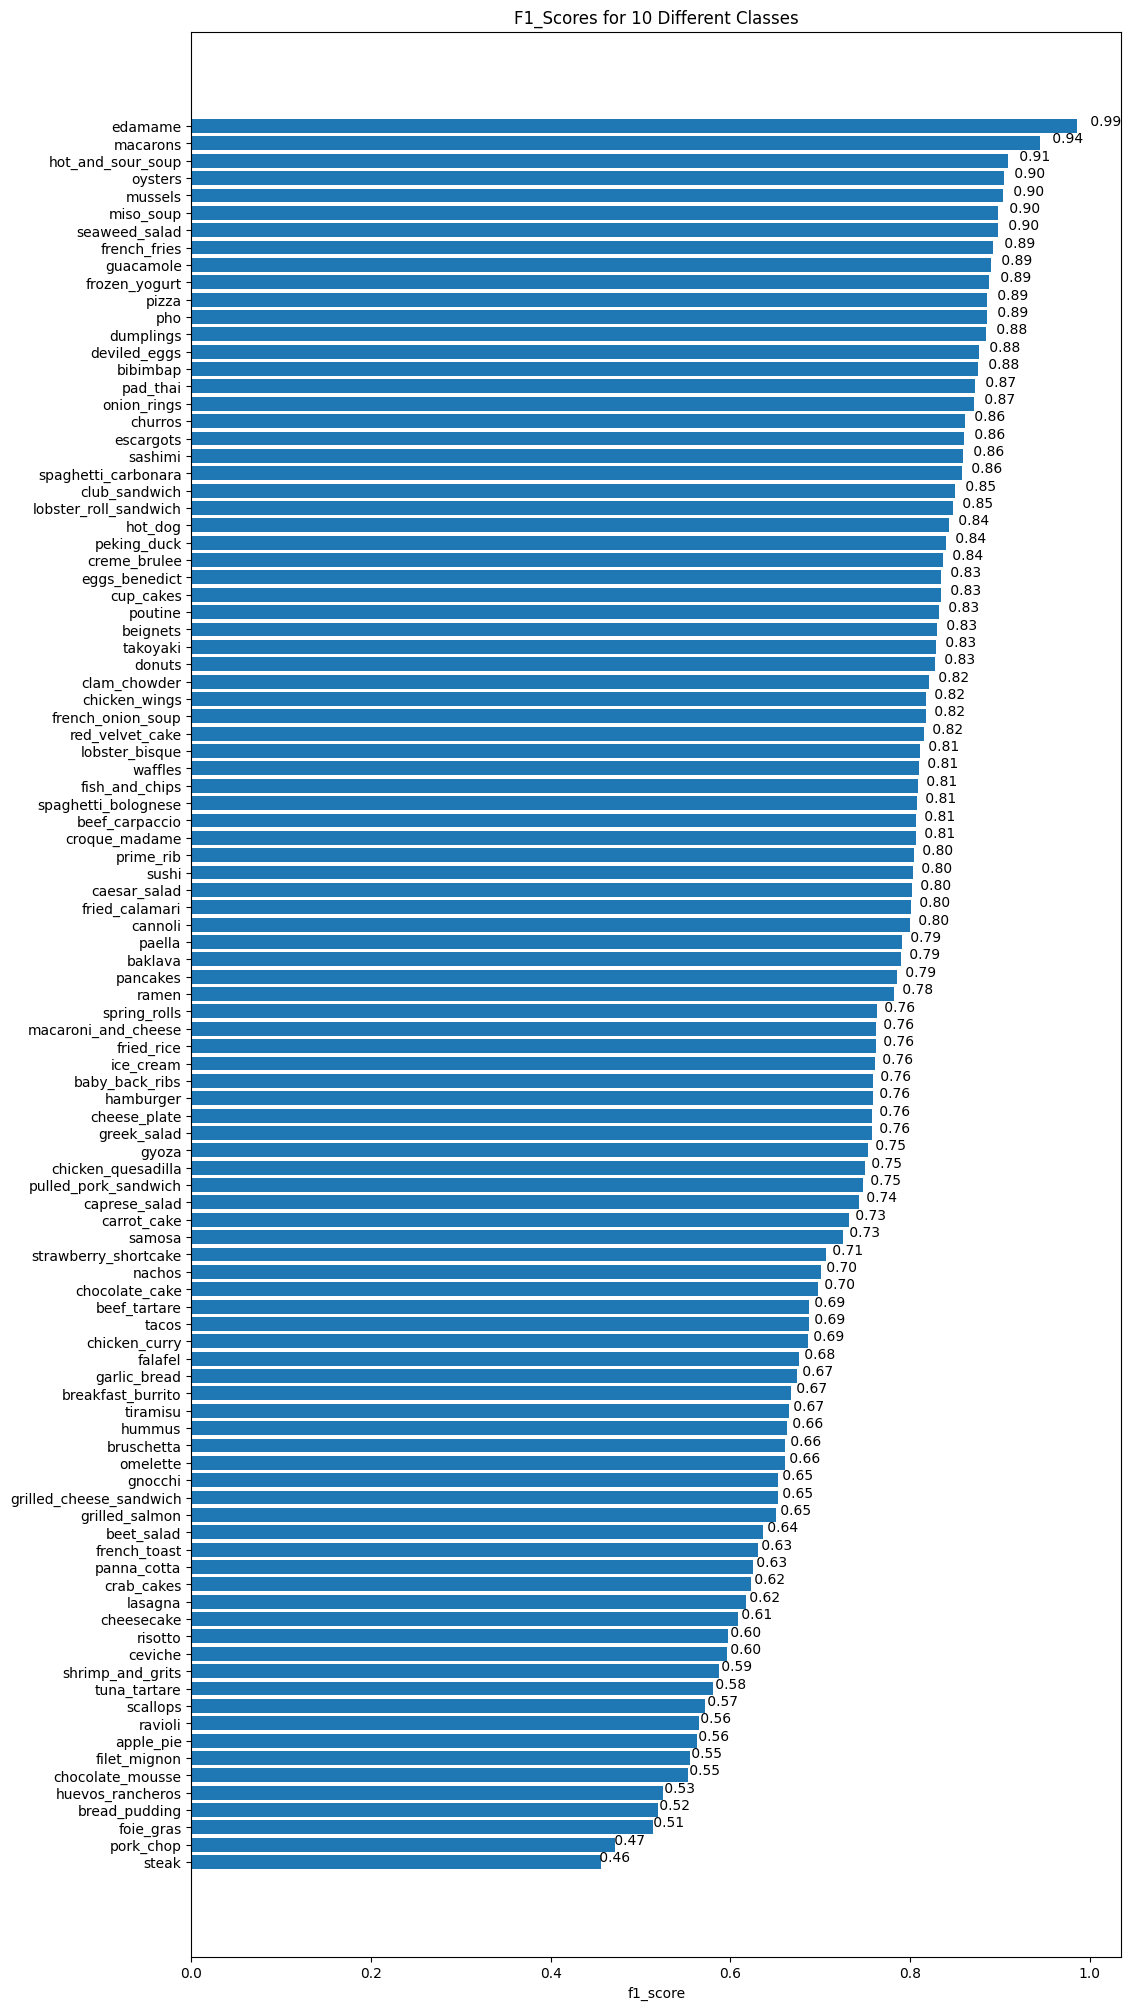

In [132]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1_score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1_score")
ax.set_title("F1_Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
    """
    Attach a text label above each bar displaying its height (it's value).
    """

    for rect in rects:
        width = rect.get_width()
        ax.text(1.03*width, rect.get_y() + rect.get_height() / 1.5,
                f"{width: .2f}",
                ha="center", va="bottom")
autolabel(scores)


In [160]:
def prepare_image(image, image_shape=224, scale=True):
    """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
    """

    #tf.image.resize() requires two arguments: The image tensor, The target size ([height, width])

    # Resize the image
    img = tf.image.resize(image,[image_shape,image_shape])

    if scale:
        # Rescale the image (get all values between 0 and 1)
        return img/255.
    else:
        return img

In [147]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

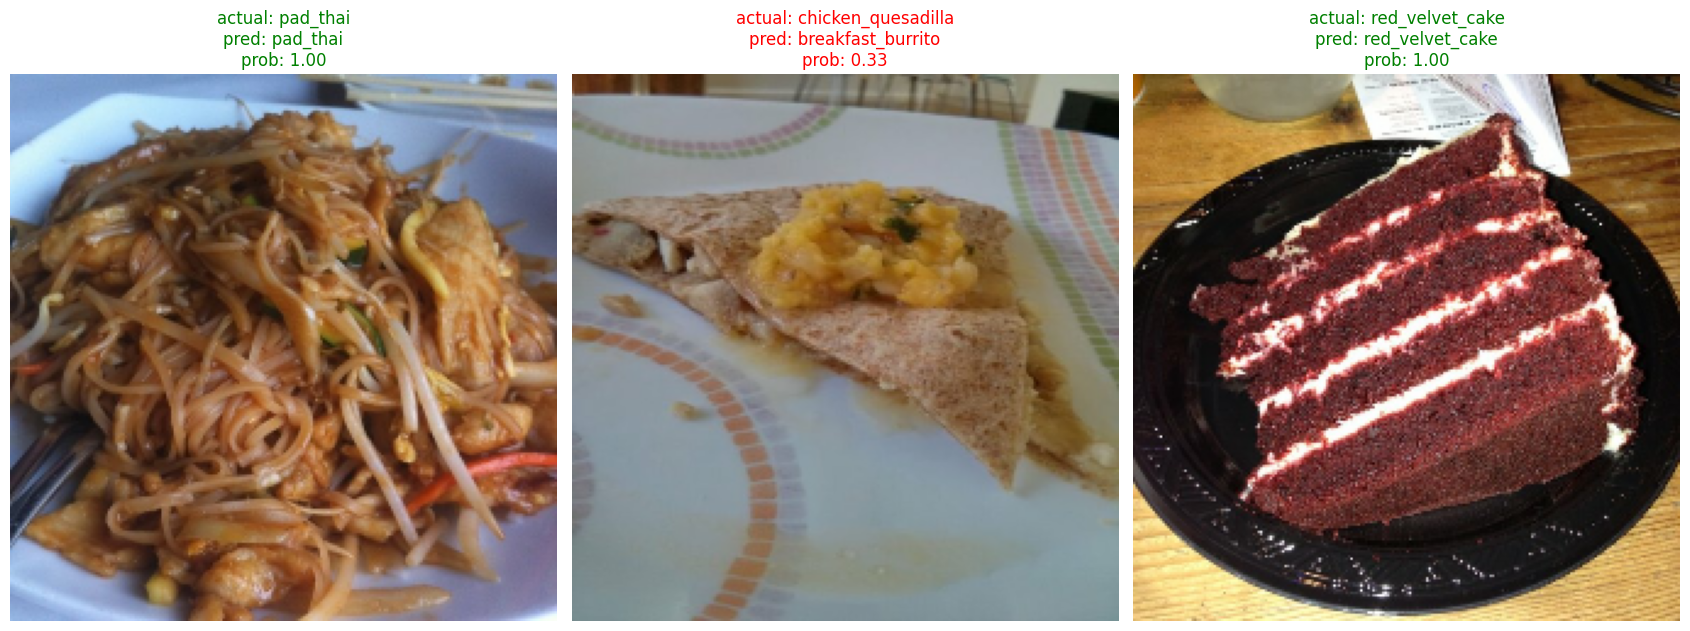

In [179]:
plt.figure(figsize=(17,10))
dataset_stream = test_data.unbatch().shuffle(buffer_size=1000).take(3)

# 1. Shuffle and take 3 samples directly from the dataset object
# ds_info is used to get the actual class names from the integers
for i, (image,label) in enumerate(dataset_stream):
    # 2. Preprocess the image (Resize and Scale)
    # We set scale=True so the model gets inputs between 0 and 1
    img_prepossed = prepare_image(image,scale=False)
    
    # 3. Make prediction
    # expand_dims is needed because model expects shape (1, 224, 224, 3)
    # pred_prob = loaded_fine_tune_model.predict(tf.expand_dims(img_prepossed,axis=0))
    pred_prob = loaded_fine_tune_model.predict(tf.expand_dims(img_prepossed, axis=0), verbose=0)
    pred_index = pred_prob.argmax()
    
    pred_class = class_names[pred_index]

    # Get the predicted class index
    pred_index = pred_prob.argmax()
    # Get the actual class name strings
    # We use ds_info to convert the label integer to a string name
    pred_class = class_names[pred_index]
    actual_class = ds_info.features["label"].int2str(int(label))
    
    # 4. Plotting

    plt.subplot(1,3,i+1)
    # Display the image
    # Note: img_processed is a Tensor, usually plt needs numpy
    plt.imshow(img_prepossed/255.)
    
    # Logic for title color (Green if correct, Red if wrong)
    if actual_class == pred_class:
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"actual: {actual_class}\npred: {pred_class}\nprob: {pred_prob.max():.2f}", c=title_color)
    plt.axis(False)

plt.tight_layout()
plt.show()

After going through enough random samples, it starts to become clear that the model tends to make far worse predictions on classes which are visually similar such as baby_back_ribs getting mistaken as steak and vice versa.

Finding the most wrong predictions
It's a good idea to go through at least 100+ random instances of your model's predictions to get a good feel for how it's doing.

After a while you might notice the model predicting on some images with a very high prediction probability, meaning it's very confident with its prediction but still getting the label wrong.

These most wrong predictions can help to give further insight into your model's performance.

So how about we write some code to collect all of the predictions where the model has output a high prediction probability for an image (e.g. 0.95+) but gotten the prediction wrong.

We'll go through the following steps:

1. Get all of the image file paths in the test dataset using the list_files() method.
2. Create a pandas DataFrame of the image filepaths, ground truth labels, prediction classes, max prediction probabilities, ground truth      class names and predicted class names.
   * Note: We don't necessarily have to create a DataFrame like this but it'll help us visualize things as we go.
3. Use our DataFrame to find all the wrong predictions (where the ground truth doesn't match the prediction).
4. Sort the DataFrame based on wrong predictions and highest max prediction probabilities.
5. Visualize the images with the highest prediction probabilities but have the wrong prediction.

In [180]:
# 1. Prepare the dataset specifically for evaluation
#    - Unbatch first to be safe (in case it was already batched)
#    - Map the preprocessing function (Resize only, NO scaling if EfficientNet)
#    - Batch it (32) for speed
#    - Prefetch for performance
def preprocess_for_eval(image, label):
    # Use scale=False based on our previous fix for EfficientNet
    img = prepare_image(image, scale=False) 
    return img, label

# Apply preprocessing to the whole test dataset
eval_ds = test_data.unbatch().map(preprocess_for_eval).batch(32).prefetch(tf.data.AUTOTUNE)

# 2. Get Predictions and True Labels
print("Making predictions on the test dataset...")

# model.predict() returns the prediction probabilities matrix
pred_probs = loaded_fine_tune_model.predict(eval_ds, verbose=1)

# We need to extract the True Labels (y_true) from the dataset to align them
# We iterate through the dataset and concatenate the label batches
y_labels = np.concatenate([y for x, y in eval_ds], axis=0)

# 3. Process predictions to get classes
pred_classes = pred_probs.argmax(axis=1)

# 4. Create the DataFrame
# Note: We removed "img_path" because TFDS data doesn't provide file paths.
pred_df = pd.DataFrame({
    "y_true": y_labels,
    "y_pred": pred_classes,
    "pred_conf": pred_probs.max(axis=1), # Max probability (Confidence)
    "y_true_classname": [class_names[i] for i in y_labels],
    "y_pred_classname": [class_names[i] for i in pred_classes]
})

# Add a boolean column to easily filter for wrong predictions later
pred_df["is_correct"] = pred_df["y_true"] == pred_df["y_pred"]

# Display the first 5 rows
pred_df.head()


Making predictions on the test dataset...
790/790 [==============================] - 172s 217ms/step


y_true  y_pred  pred_conf y_true_classname     y_pred_classname  is_correct
0      84      24   0.389891          risotto         clam_chowder       False
1      60      48   0.996682   lobster_bisque          greek_salad       False
2      29      79   0.998222        cup_cakes            prime_rib       False
3      44      62   0.350209       fried_rice  macaroni_and_cheese       False
4      27      81   0.838457     creme_brulee                ramen       False

In [196]:
# 4. Get the top 100 wrong examples
top_100_wrong = pred_df[pred_df["is_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

y_true  y_pred  pred_conf     y_true_classname y_pred_classname  \
3481       98      63        1.0             tiramisu         macarons   
20184      88      33        1.0        seaweed_salad          edamame   
4119       51      33        1.0            guacamole          edamame   
8985       63      32        1.0             macarons        dumplings   
8842       72      32        1.0             pancakes        dumplings   
8584       75      32        1.0                  pho        dumplings   
20638      68      32        1.0          onion_rings        dumplings   
8495       62      32        1.0  macaroni_and_cheese        dumplings   
8099       39      23        1.0            foie_gras          churros   
2314       71      63        1.0               paella         macarons   
4229       92      32        1.0         spring_rolls        dumplings   
21243      36      23        1.0              falafel          churros   
7158       93      32        1.0                steak        dumplings   
21400      11      69        1.0         caesar_salad          oysters   
23504       0      69        1.0            apple_pie          oysters   
6889       22      32        1.0     chocolate_mousse        dumplings   
25088      88      69        1.0        seaweed_salad          oysters   
21558      54      32        1.0    hot_and_sour_soup        dumplings   
25092      63      32        1.0             macarons        dumplings   
21793      16      23        1.0           cheesecake          churros   

       is_correct  
3481        False  
20184       False  
4119        False  
8985        False  
8842        False  
8584        False  
20638       False  
8495        False  
8099        False  
2314        False  
4229        False  
21243       False  
7158        False  
21400       False  
23504       False  
6889        False  
25088       False  
21558       False  
25092       False  
21793       False

Fetching images from dataset... this might take a moment.


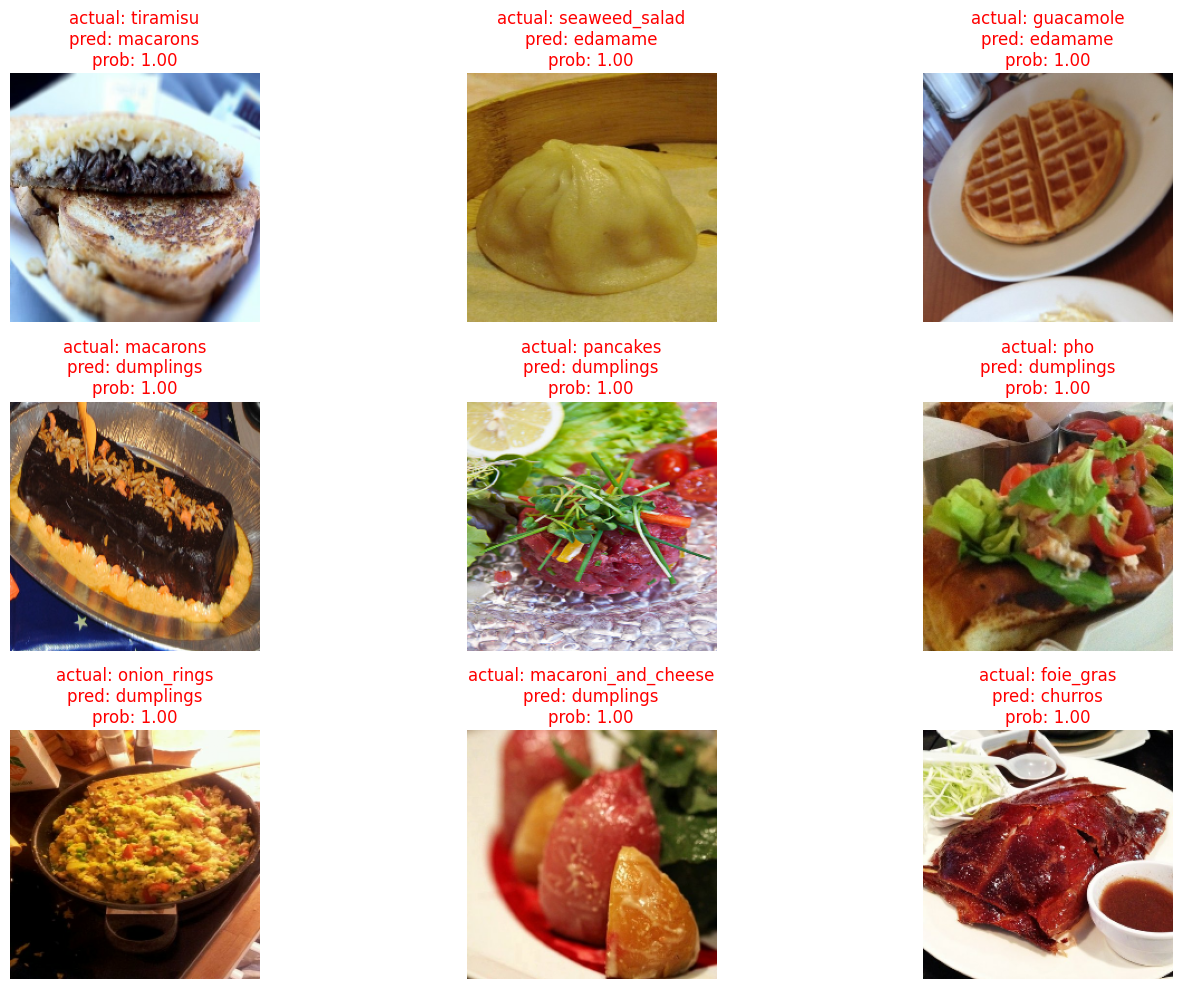

In [200]:
image_to_view = 9
start_index = 0 # Start from the very top (worst predictions)

# 2. Get the specific rows we want to visualize from the dataframe
# .iloc selects by position (e.g., the 1st to 9th row of the sorted errors)
subset_df = top_100_wrong.iloc[start_index : start_index + image_to_view]

# Get the original indices (which correspond to the dataset order)
target_indices = subset_df.index.tolist()
max_index = max(target_indices)

# 3. Fetch the actual images from the TFDS dataset
# We have to iterate the dataset to find the images that match our target indices
found_images = {}
print("Fetching images from dataset... this might take a moment.")

for i, (image, label) in enumerate(test_data.unbatch()):
    if i in target_indices:
        found_images[i] = image
    
    # Optimization: Stop searching once we passed the highest index we need
    if i >= max_index:
        break

# 4. Plotting
plt.figure(figsize=(15, 10))

for i, row in enumerate(subset_df.itertuples()):
    plt.subplot(3, 3, i+1)
    
    # 'row.Index' gives us the original index to look up in our found_images dictionary
    idx = row.Index 
    img = found_images[idx]
    
    # Preprocess for display (Scale=False for EfficientNet, /255.0 for Matplotlib)
    img_processed = prepare_image(img, scale=False)
    plt.imshow(img_processed / 255.0)
    
    # Extract info from the named tuple (safer than using row[index])
    # Assumes your columns are named: y_true_classname, y_pred_classname, pred_conf
    actual_class = row.y_true_classname
    pred_class = row.y_pred_classname
    prob = row.pred_conf
    
    plt.title(f"actual: {actual_class}\npred: {pred_class}\nprob: {prob:.2f}", c="r")
    plt.axis(False)

plt.tight_layout()
plt.show()